In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5a0119a4-4826-42eb-806e-ccdb80a9dc52',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-03-29T17:27:41.964Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 10435}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12001, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [6]:
type(data)

dict

In [7]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.984371e+07,1.984371e+07,False,NaN,1,None,None,None,2025-03-29T17:27:00.000Z,81994.499600,1.961958e+10,-39.2363,-0.472370,-2.029108,-2.578274,-3.022658,-20.206905,-12.513058,1.627075e+12,61.4202,1.721884e+12,None,2025-03-29T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:57:05.356765
1,1027,Ethereum,ETH,ethereum,10085,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206518e+08,1.206518e+08,True,NaN,2,None,None,None,2025-03-29T17:27:00.000Z,1810.723070,1.176082e+10,-34.9139,-1.395876,-3.308152,-9.101933,-21.726901,-42.935925,-45.887324,2.184670e+11,8.2469,2.184670e+11,None,2025-03-29T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:57:05.356765
2,825,Tether USDt,USDT,tether,121687,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,1.441823e+11,1.458779e+11,True,NaN,3,None,None,None,2025-03-29T17:26:00.000Z,0.999621,4.777822e+10,-31.2922,-0.000719,0.027966,-0.017328,0.056728,-0.044219,0.126456,1.441278e+11,5.4426,1.458226e+11,None,2025-03-29T17:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-29 22:57:05.356765
3,52,XRP,XRP,xrp,1566,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.820570e+10,9.998630e+10,False,NaN,4,None,None,None,2025-03-29T17:27:00.000Z,2.088674,3.918669e+09,-5.4880,-0.994919,-3.950589,-12.444429,-4.452117,-34.174983,-2.502905,1.215727e+11,4.5892,2.088674e+11,None,2025-03-29T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:57:05.356765
4,1839,BNB,BNB,bnb,2430,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424721e+08,1.424721e+08,False,NaN,5,None,None,None,2025-03-29T17:27:00.000Z,599.343366,1.368032e+09,-20.8160,-1.031928,-3.853954,-4.331017,-1.027149,-10.915151,-14.783919,8.538970e+10,3.2238,8.538970e+10,None,2025-03-29T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:57:05.356765
5,5426,Solana,SOL,solana,862,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.120258e+08,5.972372e+08,True,NaN,6,None,None,None,2025-03-29T17:27:00.000Z,124.196460,2.282171e+09,-34.5299,-1.527894,-4.290709,-3.945927,-9.757117,-47.351509,-35.503860,6.359179e+10,2.4005,7.417474e+10,None,2025-03-29T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:57:05.356765
6,3408,USDC,USDC,usd-coin,26651,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.024224e+10,6.024224e+10,False,NaN,7,None,None,None,2025-03-29T17:26:00.000Z,1.000018,7.430782e+09,-33.4458,-0.006239,0.007214,0.006265,0.011626,-0.012090,-0.014275,6.024334e+10,2.2749,6.024334e+10,None,2025-03-29T17:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-29 22:57:05.356765
7,74,Dogecoin,DOGE,dogecoin,1188,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.486324e+11,1.486324e+11,True,NaN,8,None,None,None,2025-03-29T17:27:00.000Z,0.167055,1.099240e+09,-22.9625,-1.356492,-7.565220,-0.794854,-19.844111,-49.409406,-47.167281,2.482975e+10,0.9379,2.482975e+10,None,2025-03-29T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:57:05.356765
8,2010,Cardano,ADA,cardano,1491,2017-10-01T00:00:00.000Z,"[dpos, pos, platform,

In [27]:
import os
import json
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5a0119a4-4826-42eb-806e-ccdb80a9dc52',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

 


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'D:\Data Analysis Projects\Automate API Extraction\API.csv'):
        df.to_csv(r'D:\Data Analysis Projects\Automate API Extraction\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Data Analysis Projects\Automate API Extraction\API.csv', mode='a', header=False)
        
    #df = pd.read_csv(r'D:\Data Analysis Projects\Automate API Extraction\API.csv')


In [18]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [21]:
df72 = pd.read_csv(r'D:\Data Analysis Projects\Automate API Extraction\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.984371e+07,1.984371e+07,False,NaN,1,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,81718.003856,1.952873e+10,-39.4665,-0.954752,-2.591974,-2.862762,-3.262567,-20.583212,-12.930038,1.621589e+12,61.2347,1.716078e+12,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
1,1,1027,Ethereum,ETH,ethereum,10085,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206518e+08,1.206518e+08,True,NaN,2,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,1801.752369,1.179574e+10,-34.7098,-2.218232,-4.036198,-9.425001,-21.991267,-43.359443,-46.288905,2.173847e+11,8.2089,2.173847e+11,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
2,2,825,Tether USDt,USDT,tether,121687,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'wav...",NaN,1.441823e+11,1.458779e+11,True,NaN,3,NaN,NaN,NaN,2025-03-29T17:21:00.000Z,0.999697,4.732320e+10,-31.7042,0.013520,0.036383,-0.000949,0.068105,-0.030468,0.150304,1.441387e+11,5.4276,1.458337e+11,NaN,2025-03-29T17:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-29 22:52:49.609248
3,3,52,XRP,XRP,xrp,1566,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.820570e+10,9.998630e+10,False,NaN,4,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,2.081282,3.911580e+09,-5.5437,-1.340364,-4.360783,-12.613173,-4.716728,-34.541407,-2.964736,1.211425e+11,4.5746,2.081282e+11,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
4,4,1839,BNB,BNB,bnb,2430,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424721e+08,1.424721e+08,False,NaN,5,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,598.764348,1.363014e+09,-21.0577,-1.121183,-3.924937,-4.368288,-1.045400,-11.073420,-14.949041,8.530721e+10,3.2156,8.530721e+10,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
5,5,5426,Solana,SOL,solana,862,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.120258e+08,5.972372e+08,True,NaN,6,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,124.039853,2.274224e+09,-34.7638,-1.709284,-4.486481,-3.941464,-9.775876,-47.490767,-35.692065,6.351160e+10,2.3983,7.408121e+10,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
6,6,3408,USDC,USDC,usd-coin,26651,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.024224e+10,6.024224e+10,False,NaN,7,NaN,NaN,NaN,2025-03-29T17:21:00.000Z,1.000078,7.220881e+09,-34.3139,0.001509,0.015546,0.014280,0.012521,0.009767,-0.001436,6.024693e+10,2.2686,6.024693e+10,NaN,2025-03-29T17:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-29 22:52:49.609248
7,7,74,Dogecoin,DOGE,dogecoin,1188,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.486324e+11,1.486324e+11,True,NaN,8,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,0.166656,1.092587e+09,-23.5114,-1.667337,-7.829857,-0.933898,-20.027661,-49.633457,-47.391603,2.477048e+10,0.9348,2.477048e+10,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
8,8,2010,Cardano,ADA,cardano,1491,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform',

In [25]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19843712.00000,19843712.00000,False,NaN,1,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,81718.00386,19528729317.31214,-39.46650,-0.95475,-2.59197,-2.86276,-3.26257,-20.58321,-12.93004,1621588533727.56030,61.23470,1716078080969.87012,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
1,1,1027,Ethereum,ETH,ethereum,10085,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120651811.66643,120651811.66643,True,NaN,2,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,1801.75237,11795744554.02832,-34.70980,-2.21823,-4.03620,-9.42500,-21.99127,-43.35944,-46.28890,217384687552.50369,8.20890,217384687552.50000,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
2,2,825,Tether USDt,USDT,tether,121687,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'wav...",NaN,144182349120.78696,145877857636.93381,True,NaN,3,NaN,NaN,NaN,2025-03-29T17:21:00.000Z,0.99970,47323195297.86385,-31.70420,0.01352,0.03638,-0.00095,0.06810,-0.03047,0.15030,144138689453.60587,5.42760,145833684555.04999,NaN,2025-03-29T17:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-29 22:52:49.609248
3,3,52,XRP,XRP,xrp,1566,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58205697378.00000,99986304107.00000,False,NaN,4,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,2.08128,3911579848.65870,-5.54370,-1.34036,-4.36078,-12.61317,-4.71673,-34.54141,-2.96474,121142465595.01428,4.57460,208128192002.04999,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
4,4,1839,BNB,BNB,bnb,2430,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142472086.96000,142472086.96000,False,NaN,5,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,598.76435,1363013983.78543,-21.05770,-1.12118,-3.92494,-4.36829,-1.04540,-11.07342,-14.94904,85307206316.57986,3.21560,85307206316.58000,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
5,5,5426,Solana,SOL,solana,862,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,512025790.02435,597237172.99938,True,NaN,6,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,124.03985,2274224121.44421,-34.76380,-1.70928,-4.48648,-3.94146,-9.77588,-47.49077,-35.69206,63511603763.92271,2.39830,74081211188.25000,NaN,2025-03-29T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-29 22:52:49.609248
6,6,3408,USDC,USDC,usd-coin,26651,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,60242243285.90737,60242243285.90737,False,NaN,7,NaN,NaN,NaN,2025-03-29T17:21:00.000Z,1.00008,7220880644.02448,-34.31390,0.00151,0.01555,0.01428,0.01252,0.00977,-0.00144,60246934235.96768,2.26860,60246934235.97000,NaN,2025-03-29T17:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-29 22:52:49.609248
7,7,74,Dogecoin,DOGE,dogecoin,1188,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148632396383.70523,148632396383.70523,True,NaN,8,NaN,NaN,NaN,2025-03-29T17:22:00.000Z,0.16666,1092586818.97152,-23.51140,-1.66734,-7.82986,-0.93390,-20.02766,-49.63346,-47.39160,24770484400.22466,0.93480,24770484400.22

In [31]:

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.54738,-2.10614,-2.61258,-3.06580,-20.27572,-12.57130
Ethereum,-1.51159,-3.38408,-9.11302,-21.72999,-42.99541,-45.94284
Tether USDt,0.00287,0.02952,-0.01401,0.06269,-0.03799,0.13533
XRP,-0.95149,-3.91034,-12.40252,-4.42944,-34.18770,-2.51426
BNB,-0.98570,-3.80559,-4.29336,-0.98364,-10.90644,-14.77743
Solana,-1.48511,-4.23604,-3.88018,-9.70446,-47.34308,-35.49853
USDC,-0.00503,0.00548,0.00589,0.01020,-0.00810,-0.01408
Dogecoin,-1.30183,-7.49342,-0.73499,-19.81055,-49.40873,-47.16193
Cardano,-0.97078,-4.75678,-5.74144,1.45821,-30.13358,-23.80676


In [33]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.54738
              quote.USD.percent_change_24h    -2.10614
              quote.USD.percent_change_7d     -2.61258
              quote.USD.percent_change_30d    -3.06580
              quote.USD.percent_change_60d   -20.27572
              quote.USD.percent_change_90d   -12.57130
Ethereum      quote.USD.percent_change_1h     -1.51159
              quote.USD.percent_change_24h    -3.38408
              quote.USD.percent_change_7d     -9.11302
              quote.USD.percent_change_30d   -21.72999
              quote.USD.percent_change_60d   -42.99541
              quote.USD.percent_change_90d   -45.94284
Tether USDt   quote.USD.percent_change_1h      0.00287
              quote.USD.percent_change_24h     0.02952
              quote.USD.percent_change_7d     -0.01401
              quote.USD.percent_change_30d     0.06269
              quote.USD.percent_change_60d    -0.03799
              quote.US

In [35]:
type(df4)

pandas.core.series.Series

In [37]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.54738
             quote.USD.percent_change_24h  -2.10614
             quote.USD.percent_change_7d   -2.61258
             quote.USD.percent_change_30d  -3.06580
             quote.USD.percent_change_60d -20.27572
             quote.USD.percent_change_90d -12.57130
Ethereum     quote.USD.percent_change_1h   -1.51159
             quote.USD.percent_change_24h  -3.38408
             quote.USD.percent_change_7d   -9.11302
             quote.USD.percent_change_30d -21.72999
             quote.USD.percent_change_60d -42.99541
             quote.USD.percent_change_90d -45.94284
Tether USDt  quote.USD.percent_change_1h    0.00287
             quote.USD.percent_change_24h   0.02952
             quote.USD.percent_change_7d   -0.01401
             quote.USD.percent_change_30d   0.06269
             quote.USD.percent_change_60d  -0.03799
             quote.USD.percent_change_90d   0.13533
XRP          quote.USD.percent_change_1h   -0.95149
             quote.USD.percent_change_24h  -3.91034
             quote.USD.percent_change_7d  -12.40252
             quote.USD.percent_change_30d  -4.42944
             quote.USD.percent_change_60d -34.18770
             quote.USD.percent_change_90d  -2.51426
BNB          quote.USD.percent_change_1h   -0.98570
             quote.USD.percent_change_24h  -3.80559
             quote.USD.percent_change_7d   -4.29336
             quote.USD.percent_change_30d  -0.98364
             quote.USD.percent_change_60d -10.90644
             quote.USD.percent_change_90d -14.77743
Solana       quote.USD.percent_change_1h   -1.48511
             quote.USD.percent_change_24h  -4.23604
             quote.USD.percent_change_7d   -3.88018
             quote.USD.percent_change_30d  -9.70446
             quote.USD.percent_change_60d -47.34308
             quote.USD.percent_change_90d -35.49853
USDC         quote.USD.percent_change_1h   -0.00503
             quote.USD.percent_change_24h   0.00548
             quote.USD.percent_change_7d    0.00589
             quote.USD.percent_change_30d   0.01020
             quote.USD.percent_change_60d  -0.00810
             quote.USD.percent_change_90d  -0.01408
Dogecoin     quote.USD.percent_change_1h   -1.30183
             quote.USD.percent_change_24h  -7.49342
             quote.USD.percent_change_7d   -0.73499
             quote.USD.percent_change_30d -19.81055
             quote.USD.percent_change_60d -49.40873
             quote.USD.percent_change_90d -47.16193
Cardano      quote.USD.percent_change_1h   -0.97078
             quote.USD.percent_change_24h  -4.75678
             quote.USD.percent_change_7d   -5.74144
             quote.USD.percent_change_30d   1.45821
             quote.USD.percent_change_60d -30.13358
             quote.USD.percent_change_90d -23.80676
TRON         quote.USD.percent_change_1h   -0.80860
             quote.USD.percent_change_24h   0.41890
             quote.USD.percent_change_7d   -0.86138
             quote.USD.percent_change_30d   2.39511
             quote.USD.percent_change_60d  -4.74621
             quote.USD.percent_change_90d -10.01292
Toncoin      quote.USD.percent_change_1h   -0.35893
             quote.USD.percent_change_24h  -4.96289
             quote.USD.percent_change_7d    1.38259
             quote.USD.percent_change_30d   9.30590
             quote.USD.percent_change_60d -24.51028
             quote.USD.percent_change_90d -34.96048
UNUS SED LEO quote.USD.percent_change_1h   -0.58637
             quote.USD.percent_change_24h  -1.52460
             quote.USD.percent_change_7d   -1.28366
             quote.USD.percent_change_30d   4.41307
             quote.USD.percent_change_60d  -2.15525
             quote.USD.percent_change_90d   4.87740
Chainlink    quote.USD.percent_change_1h   -1.36935
             quote.USD.percent_change_24h  -4.85914
             quote.USD.percent_change_7d   -6.16817
             quote.USD.percent_change_30d

In [39]:
df5.count()

values    90
dtype: int64

In [48]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.54738
1,Bitcoin,quote.USD.percent_change_24h,-2.10614
2,Bitcoin,quote.USD.percent_change_7d,-2.61258
3,Bitcoin,quote.USD.percent_change_30d,-3.06580
4,Bitcoin,quote.USD.percent_change_60d,-20.27572
5,Bitcoin,quote.USD.percent_change_90d,-12.57130
6,Ethereum,quote.USD.percent_change_1h,-1.51159
7,Ethereum,quote.USD.percent_change_24h,-3.38408
8,Ethereum,quote.USD.percent_change_7d,-9.11302
9,Ethereum,quote.USD.percent_change_30d,-21.72999


In [56]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.54738
1,Bitcoin,quote.USD.percent_change_24h,-2.10614
2,Bitcoin,quote.USD.percent_change_7d,-2.61258
3,Bitcoin,quote.USD.percent_change_30d,-3.06580
4,Bitcoin,quote.USD.percent_change_60d,-20.27572
5,Bitcoin,quote.USD.percent_change_90d,-12.57130
6,Ethereum,quote.USD.percent_change_1h,-1.51159
7,Ethereum,quote.USD.percent_change_24h,-3.38408
8,Ethereum,quote.USD.percent_change_7d,-9.11302
9,Ethereum,quote.USD.percent_change_30d,-21.72999


In [67]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.54738
1,Bitcoin,24h,-2.10614
2,Bitcoin,7d,-2.61258
3,Bitcoin,30d,-3.06580
4,Bitcoin,60d,-20.27572
5,Bitcoin,90d,-12.57130
6,Ethereum,1h,-1.51159
7,Ethereum,24h,-3.38408
8,Ethereum,7d,-9.11302
9,Ethereum,30d,-21.72999


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


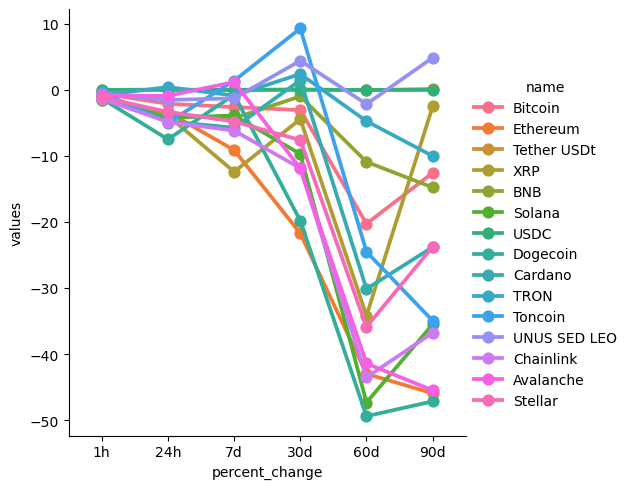

In [71]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [73]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,81718.00386,2025-03-29 22:52:49.609248
15,Bitcoin,81994.49960,2025-03-29 22:57:10.318891
30,Bitcoin,81994.49960,2025-03-29 22:57:30.829973
45,Bitcoin,81994.49960,2025-03-29 22:57:57.315083
60,Bitcoin,82099.19636,2025-03-29 22:59:00.556040


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

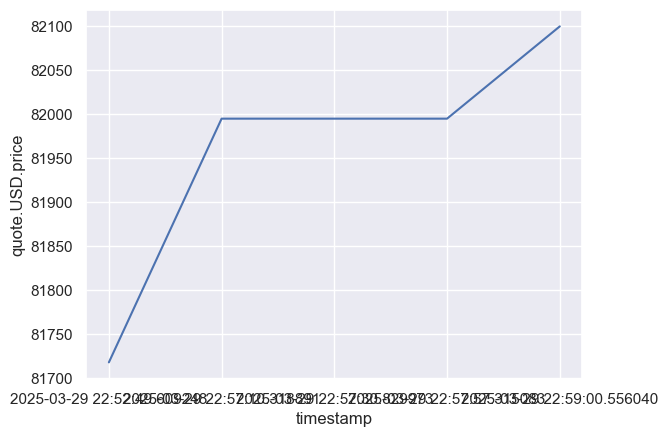

In [75]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)